In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [85]:
df = pd.read_csv('laptops.csv.1')

In [86]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Normalize column names

In [87]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Filter the dataset to use only the required columns: 'ram', 'storage', 'screen', 'final_price'

In [89]:
filtered_df = df[['ram', 'storage', 'screen', 'final_price']]
filtered_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## EDA: Look at the final_price variable to determine if it has a long tail

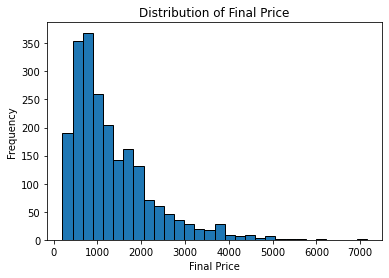

In [90]:
plt.hist(df['final_price'], bins=30, edgecolor='black')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

## Question 1: Identify which column has missing values

In [91]:
missing_columns = filtered_df.isna().sum()
missing_column_name = missing_columns[missing_columns > 0].index[0] if any(missing_columns > 0) else None
print(f"Column with missing values: {missing_column_name}")

Column with missing values: screen


In [92]:
missing_columns

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2: Calculate the median value for 'ram'

In [93]:
ram_median = filtered_df['ram'].median()
print(f"Median value for 'ram': {ram_median}")

Median value for 'ram': 16.0


## Shuffle the dataset and split it into train/val/test sets (60%/20%/20%) with seed 42

In [94]:
# Shuffle the dataset and split it into train/validation/test sets with 60%/20%/20% distribution
filtered_df_shuffled = filtered_df.sample(frac=1, random_state=42)

train_full, test = train_test_split(filtered_df_shuffled, test_size=0.2, random_state=42)
train, val = train_test_split(train_full, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

## Option 1: Fill missing values with 0

In [95]:
# Fill missing values in 'screen' column with 0 (first option)
train_0 = train.fillna({'screen': 0})
val_0 = val.fillna({'screen': 0})

# Train linear regression model without regularization
X_train_0 = train_0[['ram', 'storage', 'screen']]
y_train_0 = train_0['final_price']
X_val_0 = val_0[['ram', 'storage', 'screen']]
y_val_0 = val_0['final_price']

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

# Predict and calculate RMSE for the model with missing values filled with 0
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = round(mean_squared_error(y_val_0, y_pred_0, squared=False), 2)

## Option 2: Fill missing values with the mean (computed from training set)

In [98]:
# Fill missing values in 'screen' column with the mean (second option)
screen_mean = train['screen'].mean()
train_mean = train.fillna({'screen': screen_mean})
val_mean = val.fillna({'screen': screen_mean})

# Train linear regression model without regularization
X_train_mean = train_mean[['ram', 'storage', 'screen']]
y_train_mean = train_mean['final_price']
X_val_mean = val_mean[['ram', 'storage', 'screen']]
y_val_mean = val_mean['final_price']

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

# Predict and calculate RMSE for the model with missing values filled with the mean
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = round(mean_squared_error(y_val_mean, y_pred_mean, squared=False), 2)

## Compare RMSE

In [99]:
print(f"RMSE with 0: {rmse_zero}")
print(f"RMSE with mean: {rmse_mean}")

RMSE with 0: 615.61
RMSE with mean: 617.13


## Regularized linear regression with Ridge

In [103]:
# List of regularization parameter values to try
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Fill missing values in 'screen' column with 0 for all sets
train_filled = train.fillna({'screen': 0})
val_filled = val.fillna({'screen': 0})

X_train = train_filled[['ram', 'storage', 'screen']]
y_train = train_filled['final_price']
X_val = val_filled[['ram', 'storage', 'screen']]
y_val = val_filled['final_price']

# Train and evaluate models with different values of r
best_rmse = float('inf')
best_r = None

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = round(mean_squared_error(y_val, y_pred, squared=False), 2)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_r = r
best_r, best_rmse

(0, 616.83)

## Influence of seed on score stability

In [106]:
# List of seed values to try
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

# Loop over each seed value, split the data, train the model, and calculate RMSE
for seed in seed_values:
    # Split data with the current seed
    train_full, test = train_test_split(filtered_df_shuffled, test_size=0.2, random_state=seed)
    train, val = train_test_split(train_full, test_size=0.25, random_state=seed)

    # Fill missing values in 'screen' column with 0
    train_filled = train.fillna({'screen': 0})
    val_filled = val.fillna({'screen': 0})

    # Prepare train and validation sets
    X_train = train_filled[['ram', 'storage', 'screen']]
    y_train = train_filled['final_price']
    X_val = val_filled[['ram', 'storage', 'screen']]
    y_val = val_filled['final_price']

    # Train the model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate RMSE
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores.append(rmse)

# Calculate the standard deviation of RMSE scores
rmse_std = round(np.std(rmse_scores), 3)
rmse_std

25.271

## Train with combined train and validation datasets, use r=0.001

In [107]:
# Split the dataset using seed 9
train_full, test = train_test_split(filtered_df_shuffled, test_size=0.2, random_state=9)
train, val = train_test_split(train_full, test_size=0.25, random_state=9)

# Combine train and validation datasets
train_val = pd.concat([train, val])

# Fill missing values in 'screen' column with 0
train_val_filled = train_val.fillna({'screen': 0})
test_filled = test.fillna({'screen': 0})

# Prepare train/validation and test sets
X_train_val = train_val_filled[['ram', 'storage', 'screen']]
y_train_val = train_val_filled['final_price']
X_test = test_filled[['ram', 'storage', 'screen']]
y_test = test_filled['final_price']

# Train the model with r=0.001 (Ridge regression)
model = Ridge(alpha=0.001)
model.fit(X_train_val, y_train_val)

# Predict and calculate RMSE on the test dataset
y_pred_test = model.predict(X_test)
rmse_test = round(mean_squared_error(y_test, y_pred_test, squared=False), 2)

# Output results
rmse_0, rmse_mean, best_r, best_rmse, rmse_std, rmse_test

(616.83, 617.13, 0, 616.83, 25.271, 549.95)